In [1]:
# Using Python 3.12.1 (local env: HeatNSalt)

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
predictions = pd.read_csv('outputs/Predictions/V1-EPT-14-biomass_efficientnet_b0_grouped_predictions_mean.csv')
predictions_1 = pd.read_csv('outputs/Predictions/V1-EPT-14-biomass+1_efficientnet_b0_grouped_predictions_mean.csv').rename(columns={'y_pred': 'y_pred_+1'})
species_info = pd.read_excel('outputs/EPT-14-short-final.xlsx')

In [3]:
species_info[['Specimen ID', 'Species_DNA', 'Order_DNA']]

,Specimen ID,Species_DNA,Order_DNA
0,4_F12,Goera pilosa,Trichoptera
1,4_G3,Potamophylax rotundipennis,Trichoptera
2,4_G4,Baetis vernus,Ephemeroptera
3,4_G5,Baetis rhodani,Ephemeroptera
4,4_G6,Caenis horaria,Ephemeroptera
...,...,...,...
738,10_C7,Baetis rhodani,Ephemeroptera
739,10_C8,Baetis rhodani,Ephemeroptera
740,10_C9,Baetis rhodani,Ephemeroptera
741,10_C10,Baetis rhodani,Ephemeroptera


In [4]:
predictions_pre = pd.merge(predictions, predictions_1, left_on='individual', right_on='individual', how='left')
predictions_plus = pd.merge(predictions_pre, species_info[['Specimen ID', 'Species_DNA', 'Order_DNA']], left_on='individual', right_on='Specimen ID', how='left')

In [5]:
predictions_plus

,individual,Log_weights,y_pred,Log+1_weights,y_pred_+1,Specimen ID,Species_DNA,Order_DNA
0,10_A10,-3.218876,-0.853720,0.039221,0.352521,10_A10,Athripsodes cinereus,Trichoptera
1,10_A11,-0.527633,-0.337161,0.463734,0.570298,10_A11,Goera pilosa,Trichoptera
2,10_A2,-1.469676,-0.866161,0.207014,0.624440,10_A2,Baetis vernus,Ephemeroptera
3,10_A3,-0.941609,0.109238,0.329304,0.709112,10_A3,Baetis rhodani,Ephemeroptera
4,10_A4,1.885553,2.185082,2.026832,2.331206,10_A4,Ephemera danica,Ephemeroptera
...,...,...,...,...,...,...,...,...
738,9_H5,3.659193,2.935240,3.684620,3.034233,9_H5,Goera pilosa,Trichoptera
739,9_H6,1.472472,-2.828196,1.678964,0.101603,9_H6,Athripsodes cinereus,Trichoptera
740,9_H7,-0.446287,-1.045692,0.494696,0.328258,9_H7,Limnephilus lunatus,Trichoptera
741,9_H8,0.494696,-0.206909,0.970779,0.551794,9_H8,Limnephilus lunatus,Trichoptera


In [6]:
predictions_plus['Weights'] = np.exp(predictions_plus['Log_weights'])
predictions_plus['Weights_pred'] = np.exp(predictions_plus['y_pred'])
predictions_plus['Weights+1'] = np.exp(predictions_plus['Log+1_weights'])-1
predictions_plus['Weights_pred_+1'] = np.exp(predictions_plus['y_pred_+1'])-1

In [7]:
fig = px.scatter(predictions_plus, x='Log_weights', y='y_pred', trendline='ols', hover_data=['Specimen ID', 'Species_DNA', 'Weights'])
fig.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
fig = px.scatter(predictions_plus, x='Log+1_weights', y='y_pred_+1', trendline='ols', hover_data=['Specimen ID', 'Species_DNA', 'Weights'])
fig.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
fig = px.scatter(predictions_plus, x='Weights', y='Weights_pred', trendline='ols', hover_data=['Specimen ID', 'Species_DNA', 'Weights'])
fig.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



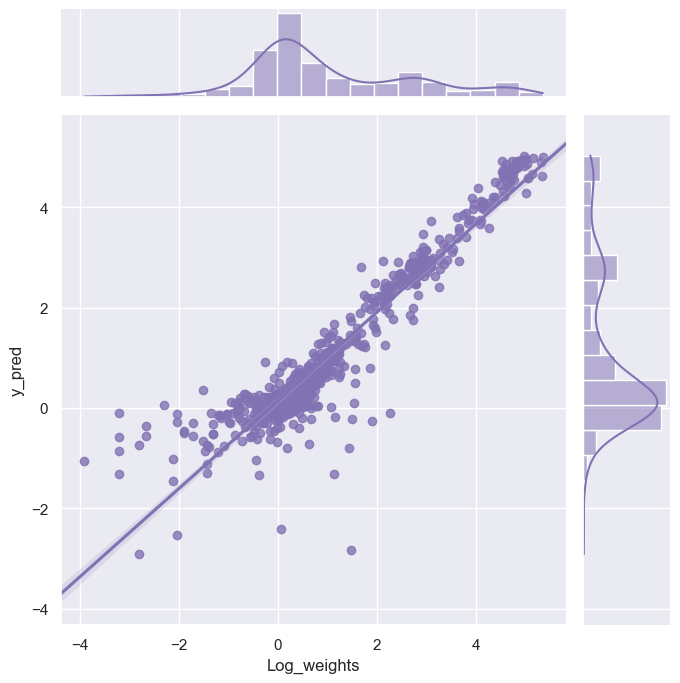

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x='Log_weights', y='y_pred', data=predictions_plus,
                  kind="reg", truncate=False,
                  color="m", height=7)

/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



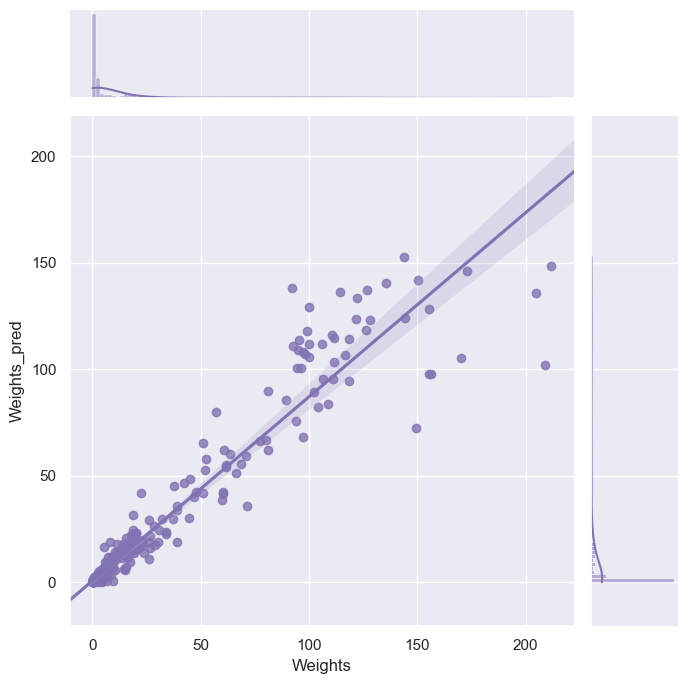

In [11]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x='Weights', y='Weights_pred', data=predictions_plus,
                  kind="reg", truncate=False,
                  color="m", height=7)

/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



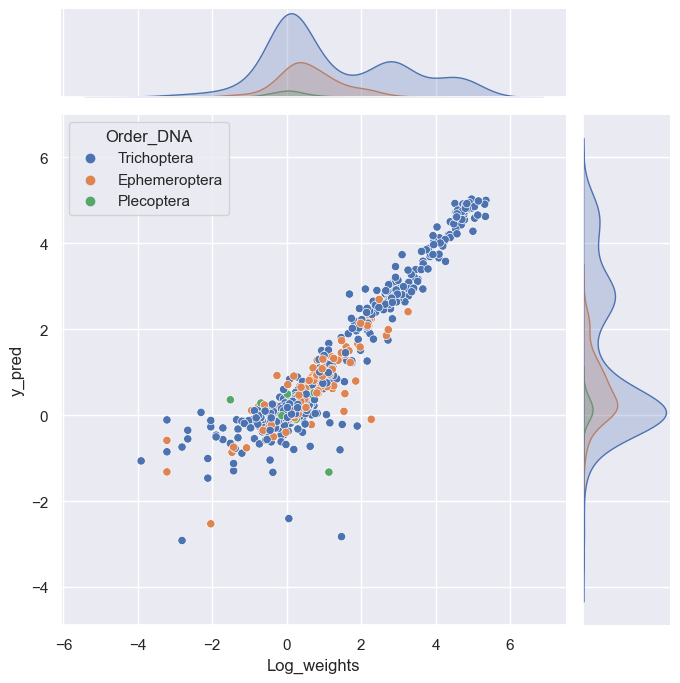

In [12]:
g = sns.jointplot(x='Log_weights', y='y_pred', data=predictions_plus,
                  hue='Order_DNA',
                  color="m", height=7)

/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/prehsen/anaconda3/envs/HeatNSalt/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



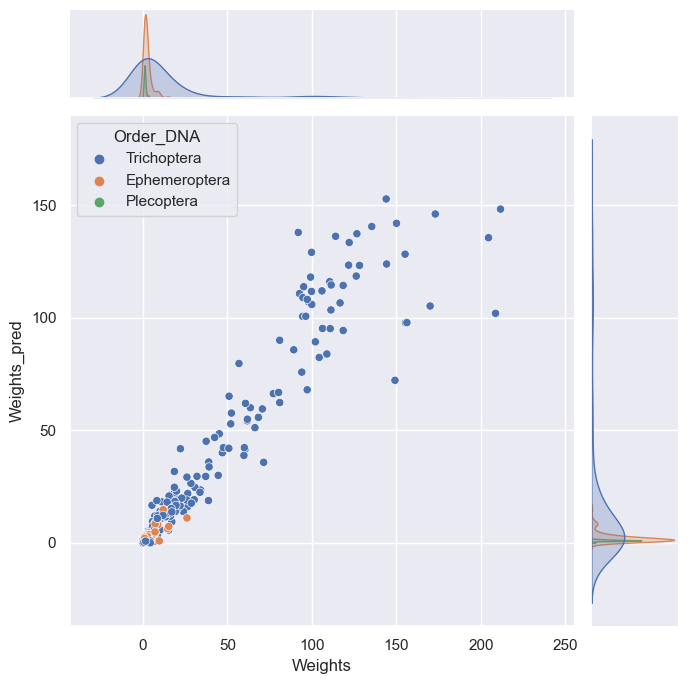

In [13]:
g = sns.jointplot(x='Weights', y='Weights_pred', data=predictions_plus,
                  hue='Order_DNA',
                  color="m", height=7)